In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv('Customer_Behaviour.csv')
d

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
d.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
d_int=list(d.select_dtypes('int').columns)
d_int

['User ID', 'Age', 'EstimatedSalary', 'Purchased']

In [14]:
da=d[['Age', 'EstimatedSalary']]

### EDA

<Axes: xlabel='Gender', ylabel='count'>

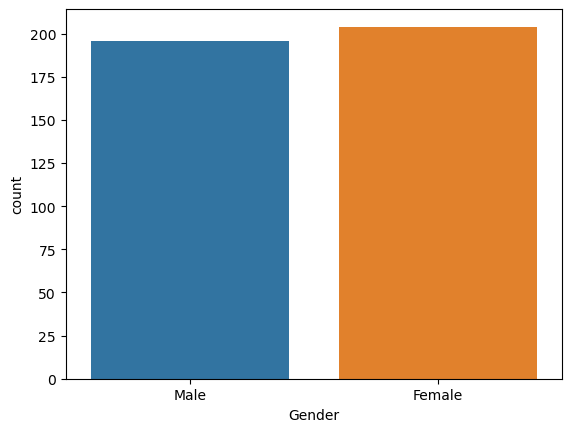

In [8]:
sns.countplot(x='Gender', data=d)

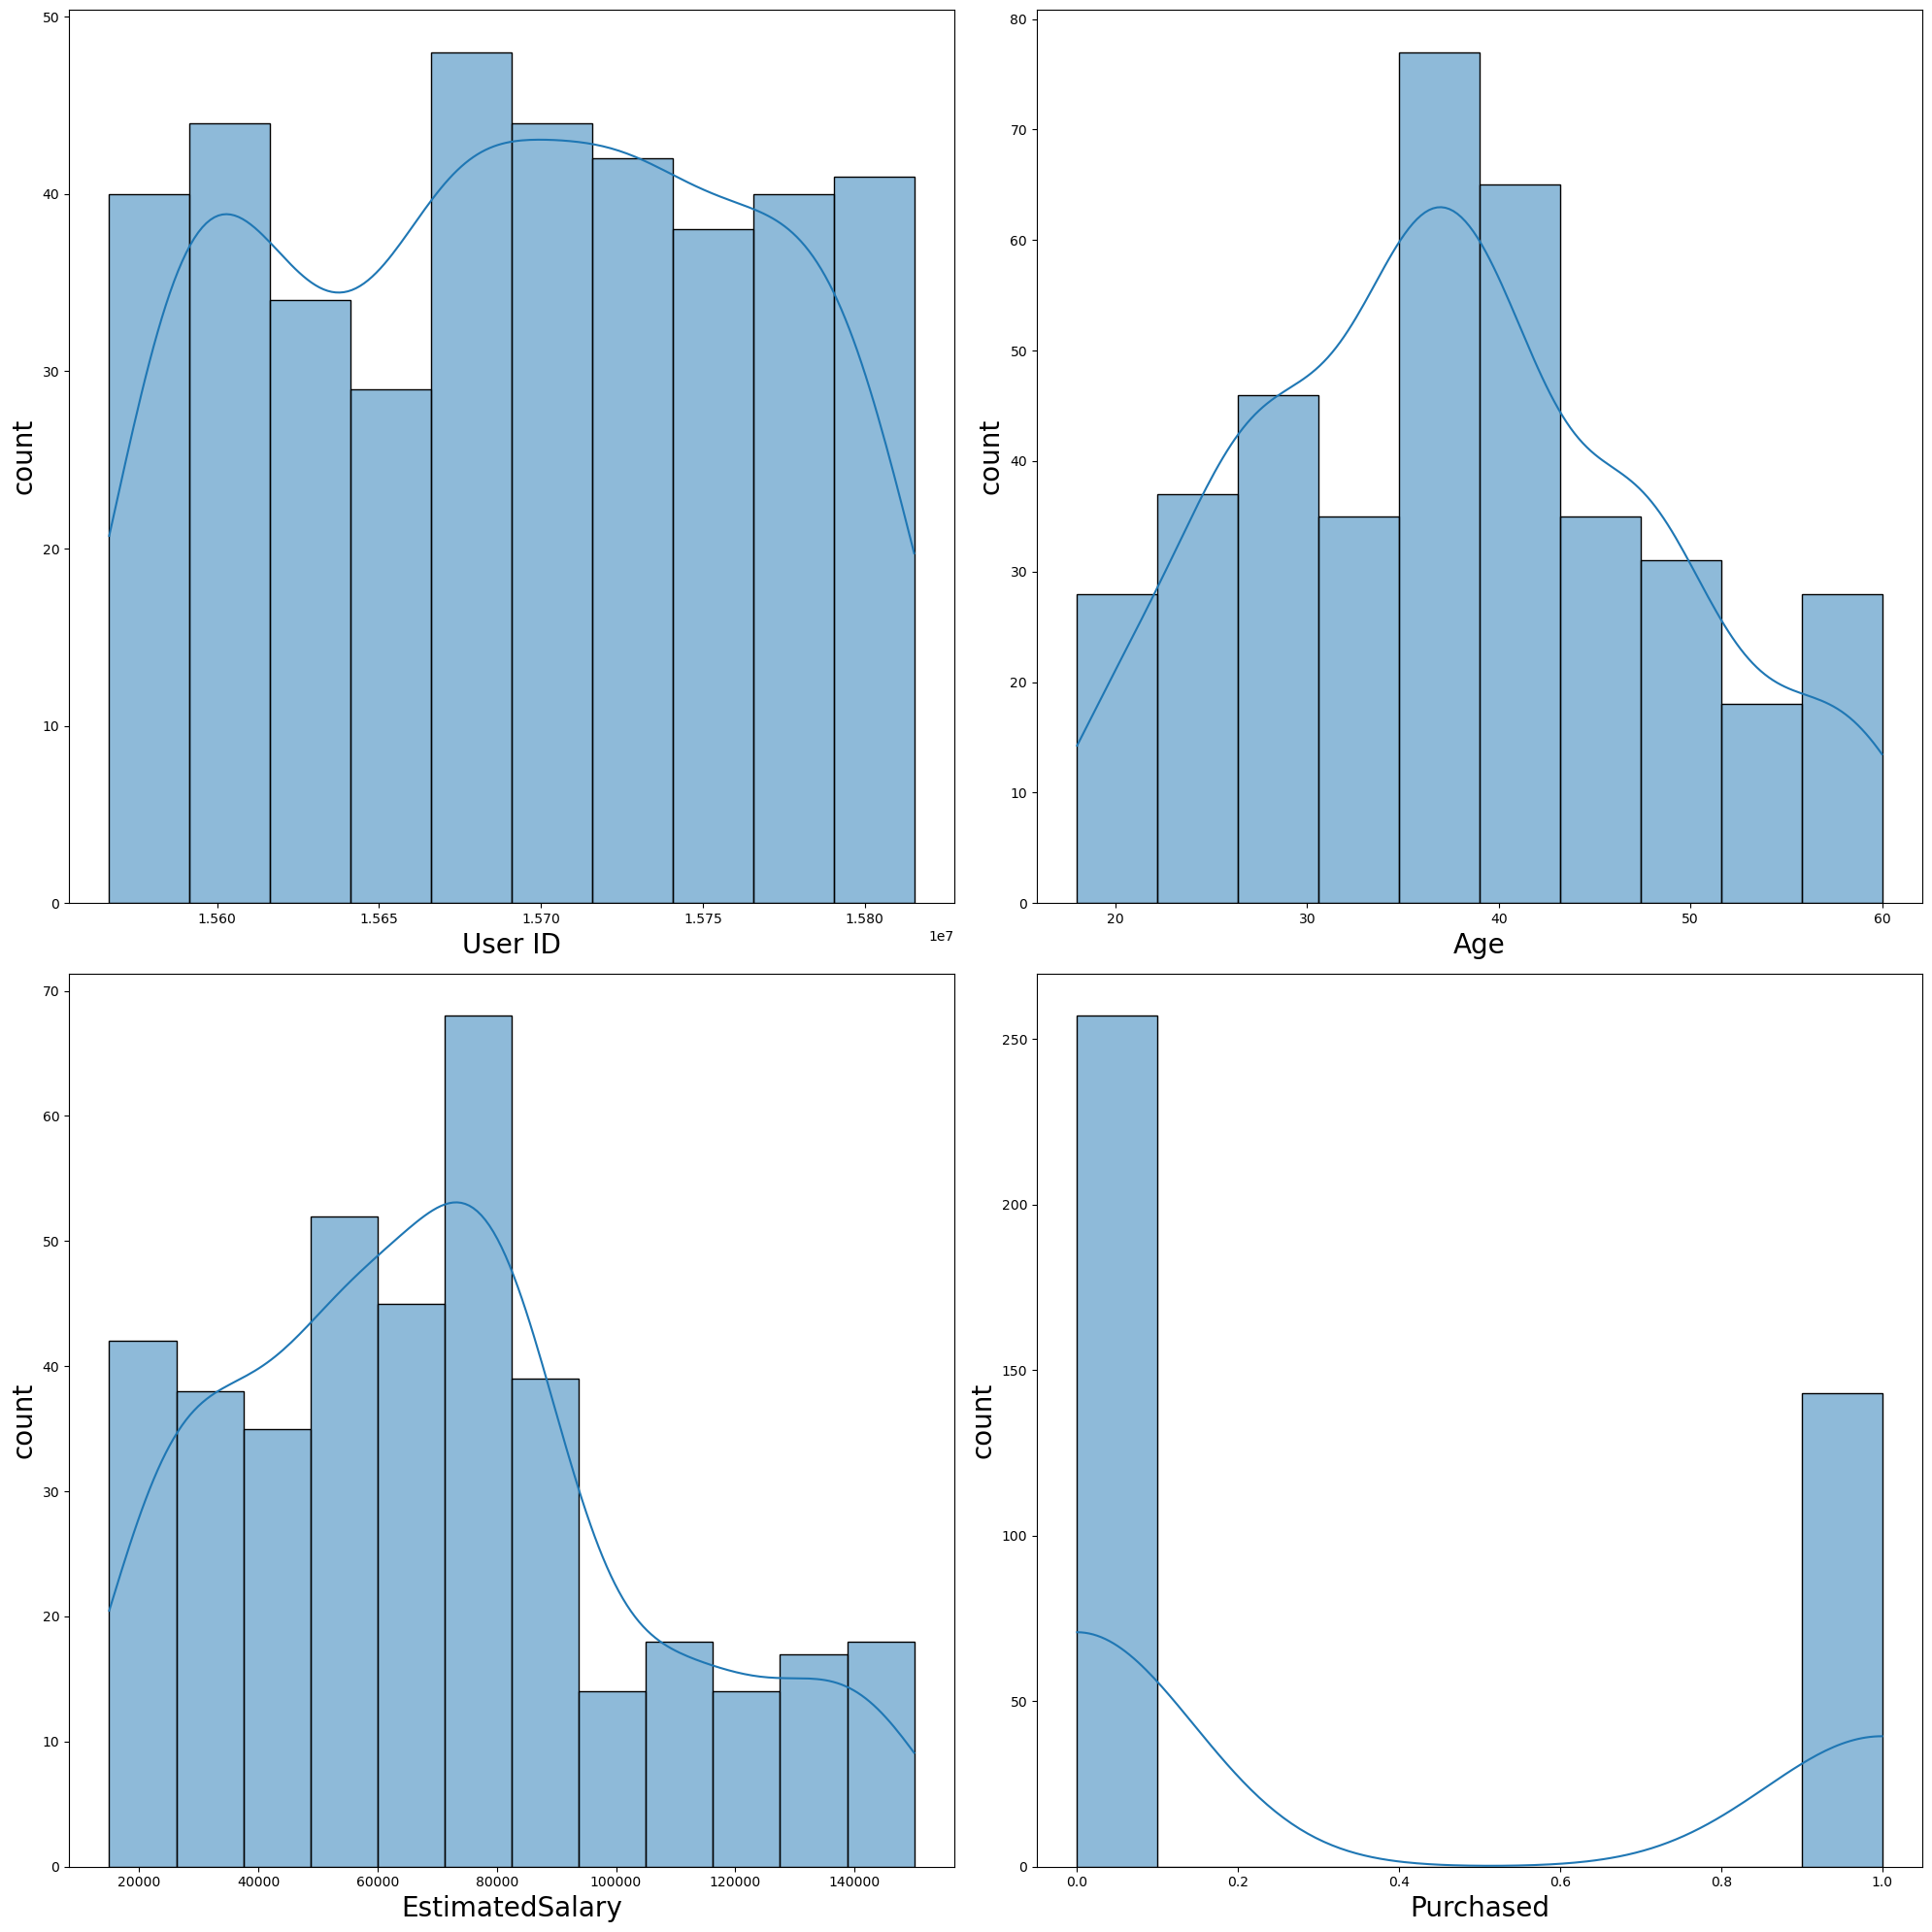

In [13]:
plt.figure(figsize=(20,20))
plot=1
for col in d_int:
    if plot<=5:
        ax=plt.subplot(2,2,plot)
        sns.histplot(d[col],kde=True)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout()

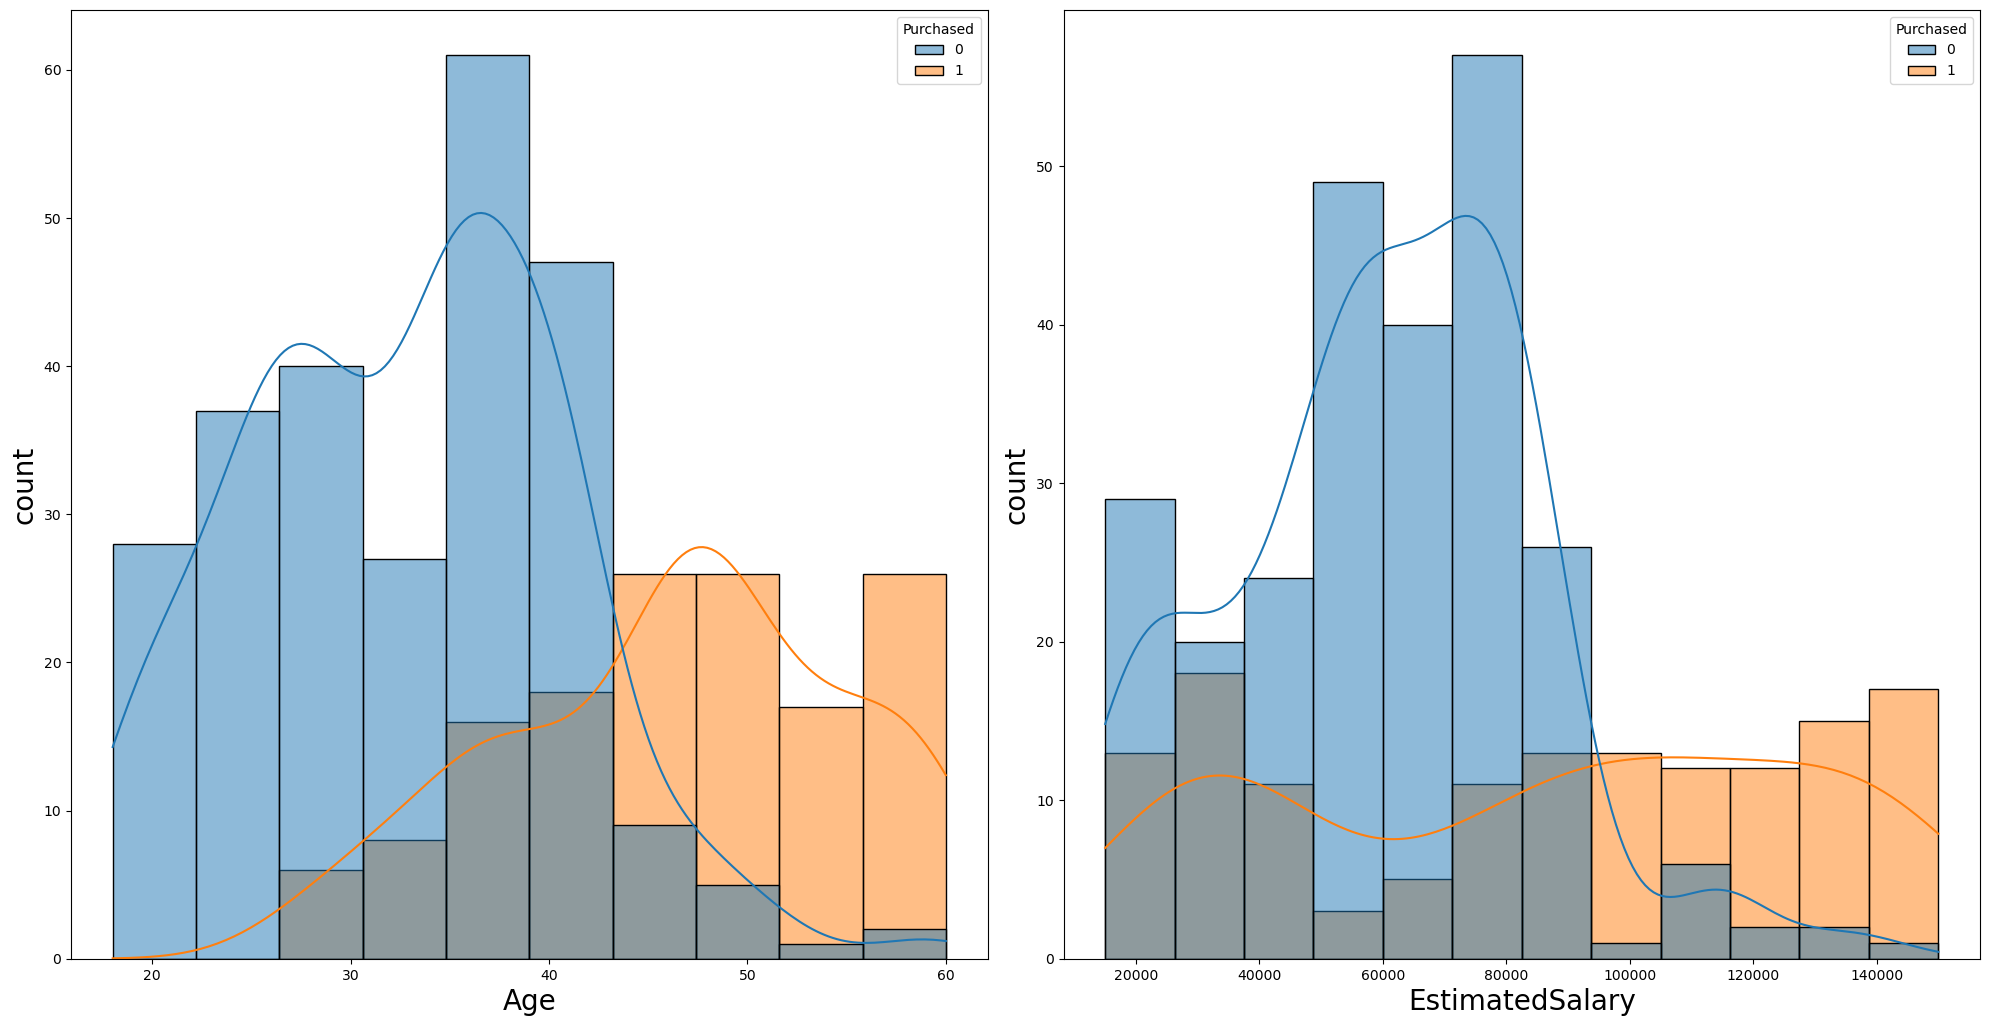

In [15]:
plt.figure(figsize=(20,20))
plot=1
for col in da:
    if plot<=5:
        ax=plt.subplot(2,2,plot)
        sns.histplot(x=da[col],kde=True,hue=d.Purchased)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout()

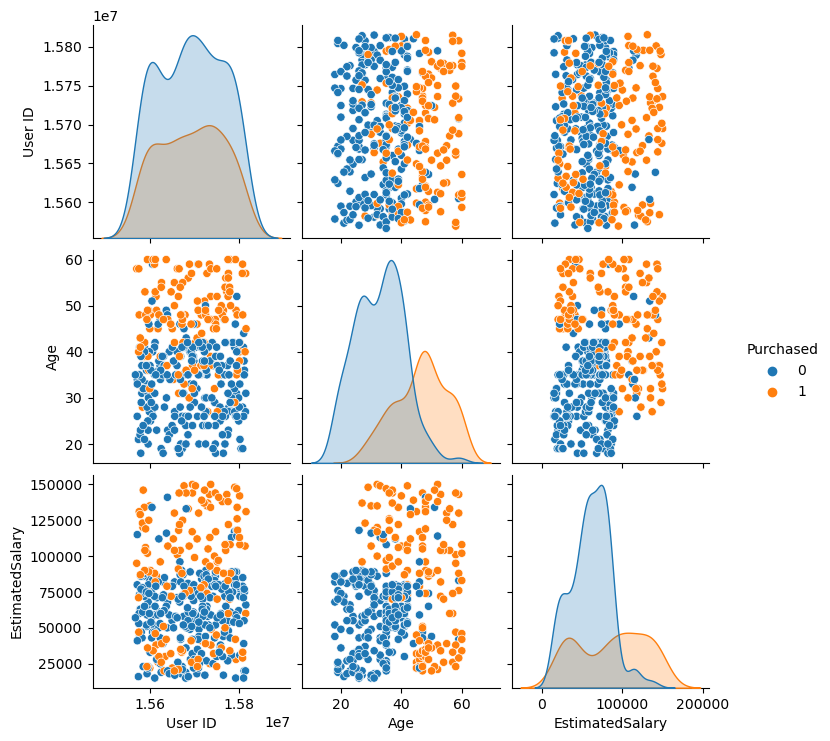

In [16]:
sns.pairplot(data=d, hue='Purchased')

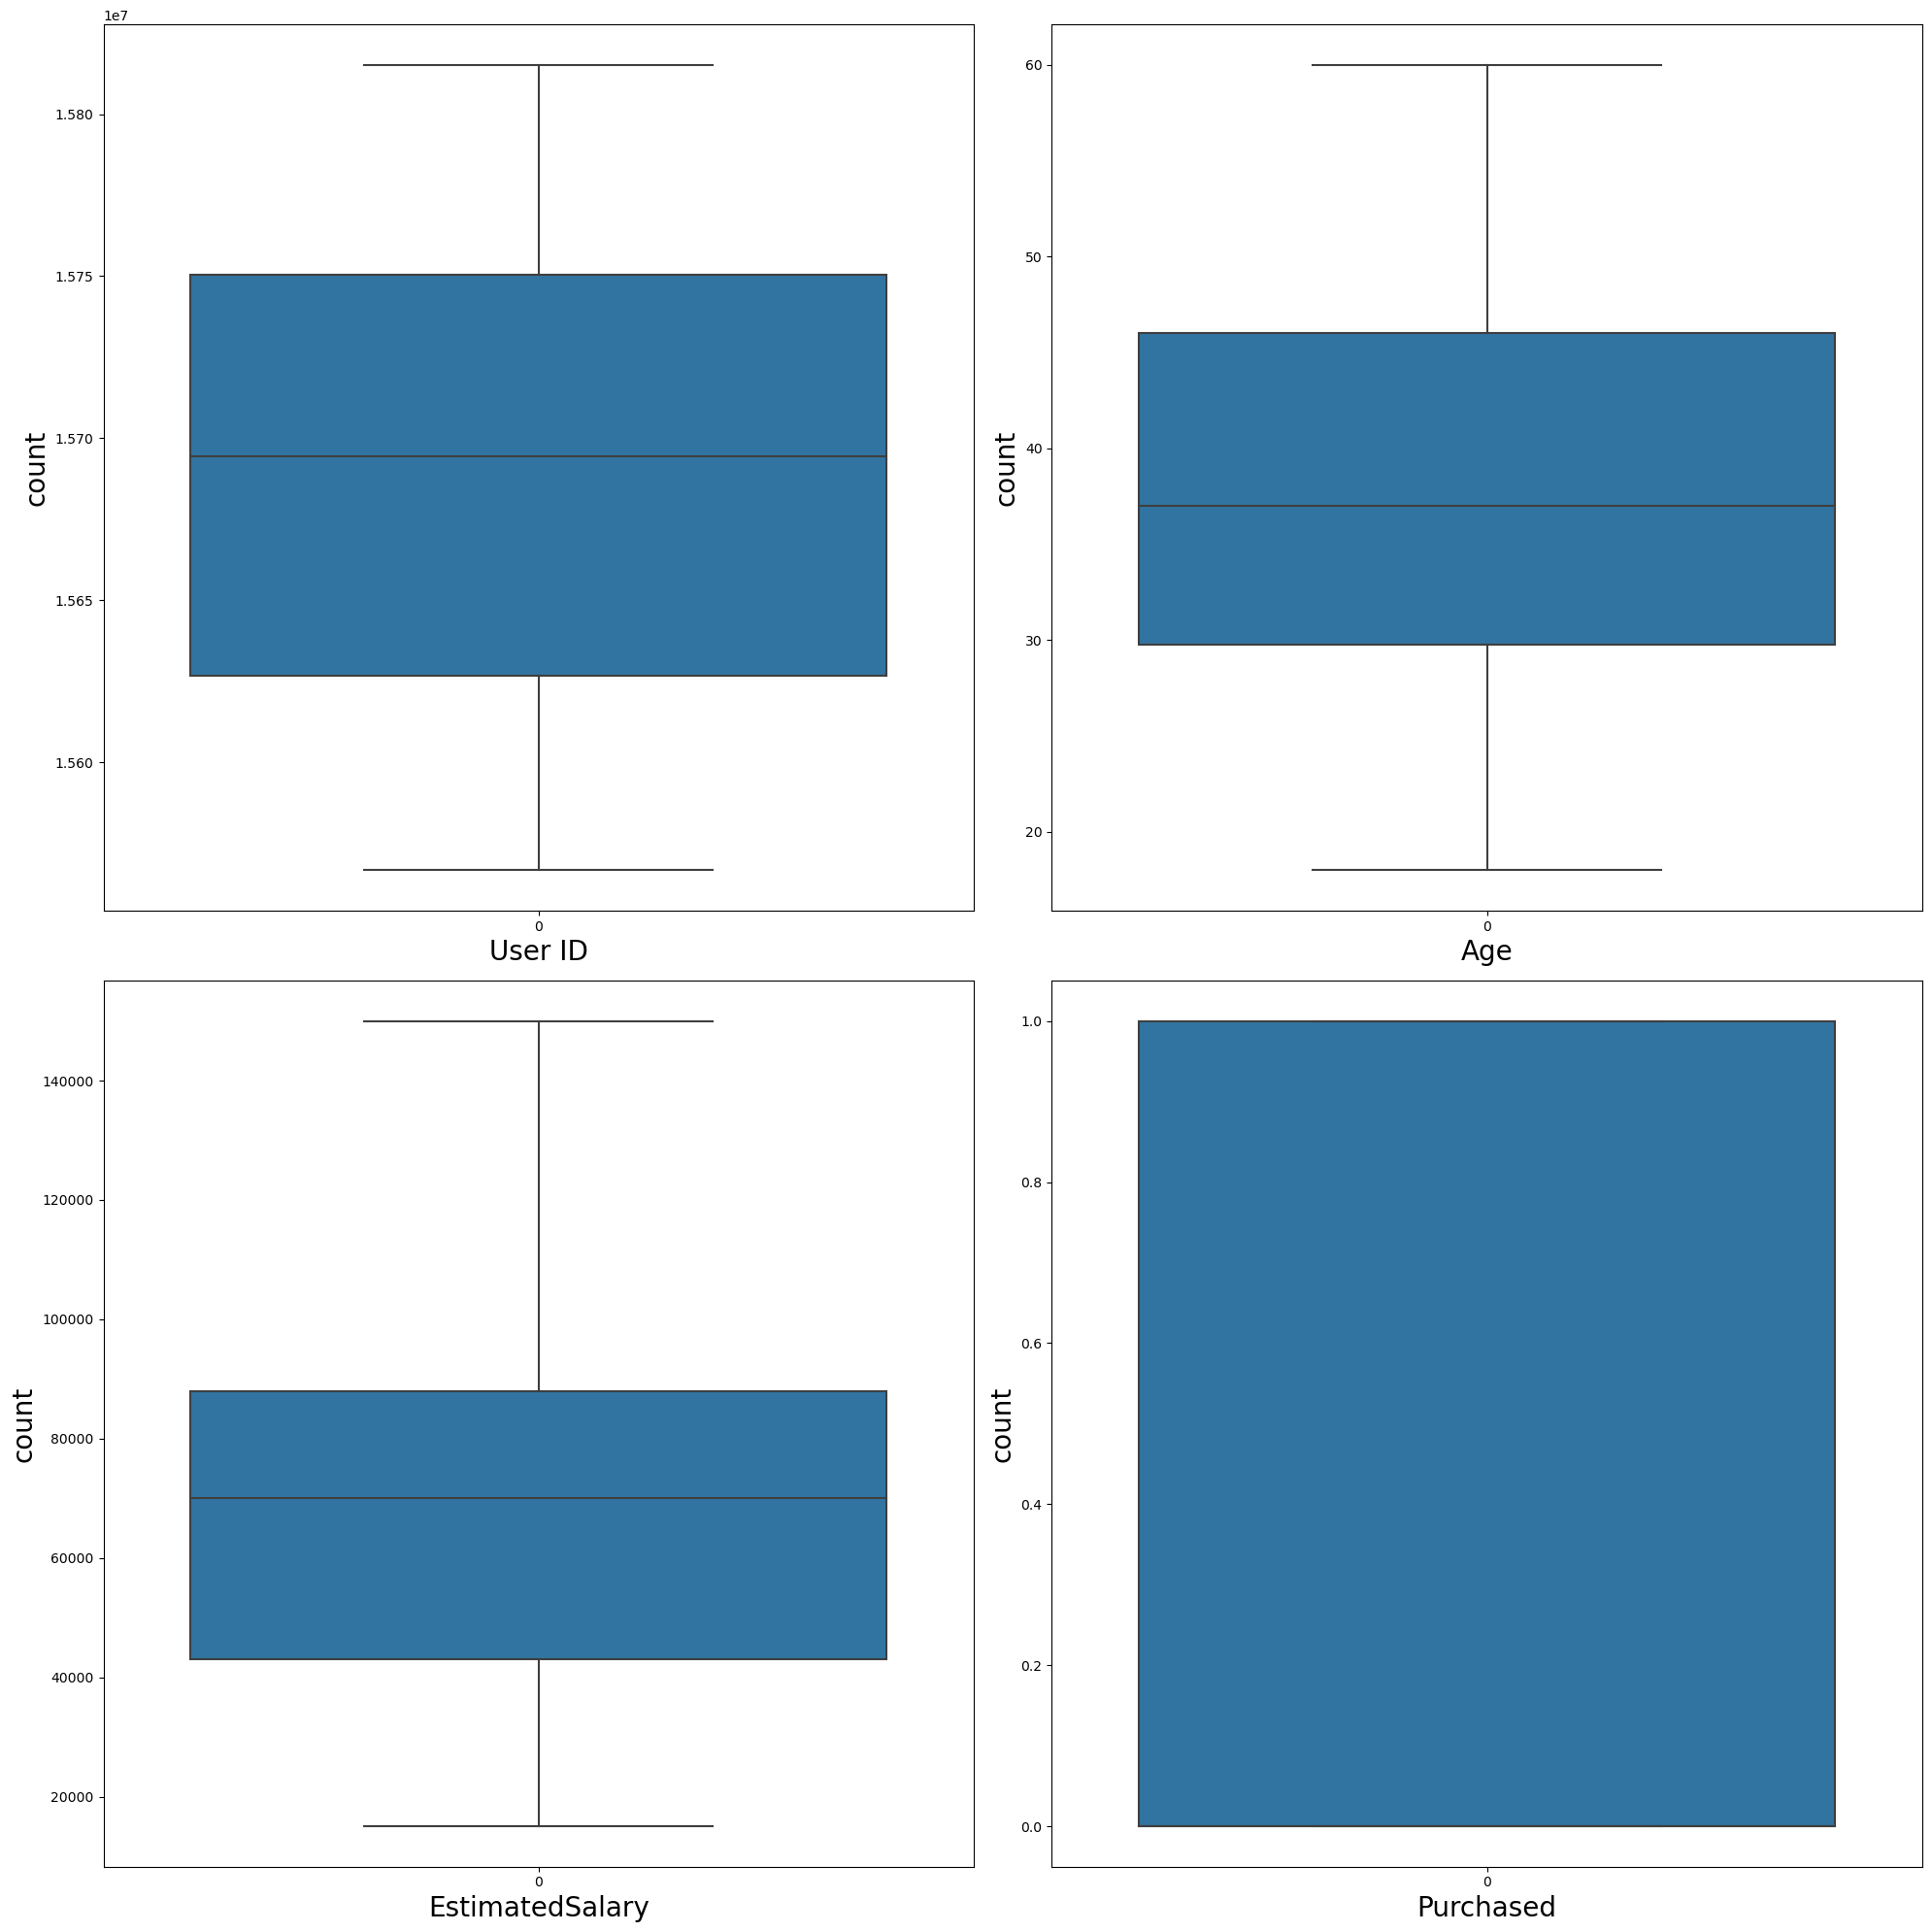

In [17]:
plt.figure(figsize=(20,20))
plot=1
for col in d_int:
    if plot<=5:
        ax=plt.subplot(2,2,plot)
        sns.boxplot(d[col])
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout()

In [19]:
d.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [24]:
df1=pd.get_dummies(d['Gender'],prefix='Gender',drop_first=True,dtype=int)
d=pd.concat([d,df1],axis=1).drop(['Gender'],axis=1)

In [25]:
d

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [26]:
d.corr()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
User ID,1.000000,-0.000721,0.071097,0.007120,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,-0.042469
Gender_Male,-0.025249,-0.073741,-0.060435,-0.042469,1.000000


In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
d[['Age','EstimatedSalary','Gender_Male']]=sc.fit_transform(d[['Age','EstimatedSalary','Gender_Male']])

<Axes: >

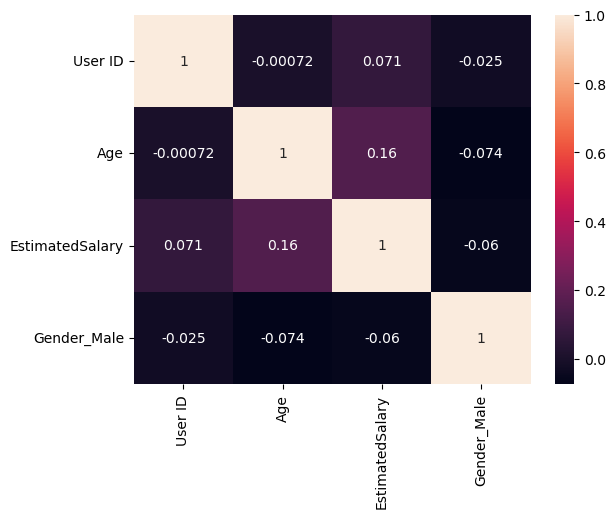

In [35]:
sns.heatmap(d.drop('Purchased', axis=1).corr(),annot=True)

In [37]:
x=d[['Age','EstimatedSalary','Gender_Male']]
x

,Age,EstimatedSalary,Gender_Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204
...,...,...,...
395,0.797057,-0.844019,-0.980196
396,1.274623,-1.372587,1.020204
397,1.179110,-1.460681,-0.980196
398,-0.158074,-1.078938,1.020204


In [41]:
y=d['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=3)

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
y_pred_prob=lr.predict_proba(x_test)
y_pred_prob

array([[3.45135308e-01, 6.54864692e-01],
       [5.96204885e-01, 4.03795115e-01],
       [1.32015866e-01, 8.67984134e-01],
       [9.95666382e-01, 4.33361760e-03],
       [9.23248919e-01, 7.67510811e-02],
       [5.09351221e-01, 4.90648779e-01],
       [3.98119689e-01, 6.01880311e-01],
       [9.95073011e-01, 4.92698902e-03],
       [7.38690166e-01, 2.61309834e-01],
       [9.96068302e-01, 3.93169835e-03],
       [7.20927170e-01, 2.79072830e-01],
       [8.22602459e-01, 1.77397541e-01],
       [1.64018524e-01, 8.35981476e-01],
       [8.82624265e-01, 1.17375735e-01],
       [9.91247307e-01, 8.75269291e-03],
       [9.96417699e-01, 3.58230149e-03],
       [9.62745950e-01, 3.72540501e-02],
       [9.65120361e-01, 3.48796389e-02],
       [2.86833827e-01, 7.13166173e-01],
       [7.62704306e-01, 2.37295694e-01],
       [8.79999279e-01, 1.20000721e-01],
       [9.76367578e-01, 2.36324223e-02],
       [9.14501354e-01, 8.54986462e-02],
       [5.15488895e-01, 4.84511105e-01],
       [6.932368

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report
cm=confusion_matrix(y_test,y_predict)
cm

array([[59,  6],
       [10, 25]], dtype=int64)

In [57]:
recall=recall_score(y_test,y_predict)
recall

0.7142857142857143

In [58]:
score=accuracy_score(y_test,y_predict)
score

0.84

In [59]:
precision=precision_score(y_test,y_predict)
precision

0.8064516129032258

In [60]:
f1=f1_score(y_test,y_predict)
f1

0.7575757575757576

### KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=5)
KN.fit(x,y)
y_predict=KN.predict(x)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [67]:
report=classification_report(y,y_predict)
report


'              precision    recall  f1-score   support\n\n           0       0.94      0.93      0.94       257\n           1       0.88      0.90      0.89       143\n\n    accuracy                           0.92       400\n   macro avg       0.91      0.91      0.91       400\nweighted avg       0.92      0.92      0.92       400\n'

In [68]:
precision=precision_score(y,y_predict)
precision

0.8767123287671232

### Hyperparameter Tunning

In [69]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [71]:
grid = GridSearchCV(KN, param_grid, cv=5, scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [72]:
print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


In [75]:
models=KNeighborsClassifier(n_neighbors= 5, p=1, weights= 'uniform',algorithm='auto')
models.fit(x,y)

KNeighborsClassifier(p=1)

In [76]:
report=classification_report(y,y_predict)
report

'              precision    recall  f1-score   support\n\n           0       0.94      0.93      0.94       257\n           1       0.88      0.90      0.89       143\n\n    accuracy                           0.92       400\n   macro avg       0.91      0.91      0.91       400\nweighted avg       0.92      0.92      0.92       400\n'

In [77]:
cm=confusion_matrix(y,y_predict)
cm

array([[239,  18],
       [ 15, 128]], dtype=int64)

In [78]:
re=recall_score(y,y_predict)
re

0.8951048951048951

### Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(x_train,y_train)#training the data

RandomForestClassifier()

In [87]:
y_predict=rf_clf.predict(x_test)

In [88]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        65
           1       0.81      0.83      0.82        35

    accuracy                           0.87       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.87      0.87       100



### Hyperparameter Tunning

In [90]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [91]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [98]:
rf_clf1 = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_test,y_test)
rf_cv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [111]:
model=rf_clf = RandomForestClassifier(n_estimators= 2000,
 min_samples_split= 4,
 min_samples_leaf= 2,
 max_features='auto',
 max_depth=50,
 bootstrap=False)

In [112]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='auto',
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=2000)

In [113]:
y_predict=model.predict(x_test)

In [114]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        65
           1       0.83      0.83      0.83        35

    accuracy                           0.88       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100

